## Pandas in 2 mins
You can't learn Pandas in 2 mins, but here are some of the basics needed for this course.

First, you can define a dict containing credit card payments, labeled as fraud or not-fraud, and create a Pandas DataFrame from it.

In [6]:
import pandas as pd

data = { 
    'credit_card_number': ['1111 2222 3333 4444', '1111 2222 3333 4444','1111 2222 3333 4444',
                           '1111 2222 3333 4444'],
    'trans_datetime': ['2022-01-01 08:44', '2022-01-01 19:44', '2022-01-01 20:44', '2022-01-01 20:55'],
    'amount': [142.34, 12.34, 66.29, 112.33],
    'location': ['Sao Paolo', 'Rio De Janeiro', 'Stockholm', 'Stockholm'],
    'fraud': [False, False, True, True] 
}

df = pd.DataFrame.from_dict(data)
df['trans_datetime']= pd.to_datetime(df['trans_datetime'])
df

,credit_card_number,trans_datetime,amount,location,fraud
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True


In [2]:
df

,credit_card_number,trans_datetime,amount,location,fraud
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   credit_card_number  4 non-null      object        
 1   trans_datetime      4 non-null      datetime64[ns]
 2   amount              4 non-null      float64       
 3   location            4 non-null      object        
 4   fraud               4 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 260.0+ bytes


In [4]:
df['trans_datetime']= pd.to_datetime(df['trans_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   credit_card_number  4 non-null      object        
 1   trans_datetime      4 non-null      datetime64[ns]
 2   amount              4 non-null      float64       
 3   location            4 non-null      object        
 4   fraud               4 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 260.0+ bytes


### Lambda functions

We will now apply a lambda function to the column `amount` and save the result in a new column `is_big` in our DataFrame `df`.

In [7]:
df['is_big'] = df['amount'].apply(lambda amount: amount > 100)
df

,credit_card_number,trans_datetime,amount,location,fraud,is_big
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False,True
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True,False
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True,True


### Apply and UDFs

We will now apply a user-defined function (UDF), `is_small`, to each row in the data DataFrame `df`.  
The result is a series that we store in a new column in `df` called 'is_small'.

In [ ]:
def is_small(row):
    return row['amount'] < 100
    
df['is_small'] = df.apply(is_small, axis=1)
df

## Rolling Windows

We will compute a rolling window over the day.

In [8]:
df_rolling = df.set_index('trans_datetime')
df_rolling

,credit_card_number,amount,location,fraud,is_big
trans_datetime,,,,,
2022-01-01 08:44:00,1111 2222 3333 4444,142.34,Sao Paolo,False,True
2022-01-01 19:44:00,1111 2222 3333 4444,12.34,Rio De Janeiro,False,False
2022-01-01 20:44:00,1111 2222 3333 4444,66.29,Stockholm,True,False
2022-01-01 20:55:00,1111 2222 3333 4444,112.33,Stockholm,True,True


In [9]:
df_rolling['rolling_max_1d'] = df_rolling.rolling('1D').amount.max()
df_rolling

,credit_card_number,amount,location,fraud,is_big,rolling_max_1d
trans_datetime,,,,,,
2022-01-01 08:44:00,1111 2222 3333 4444,142.34,Sao Paolo,False,True,142.34
2022-01-01 19:44:00,1111 2222 3333 4444,12.34,Rio De Janeiro,False,False,142.34
2022-01-01 20:44:00,1111 2222 3333 4444,66.29,Stockholm,True,False,142.34
2022-01-01 20:55:00,1111 2222 3333 4444,112.33,Stockholm,True,True,142.34


Let's create a new DataFrame, `d2`, with new data.

In [15]:
import numpy as np
import timeit 

df2 = pd.DataFrame({
    'a':np.random.randint(1,100, size=10000),
    'b':np.random.randint(100,1000, size=10000),
    'c':np.random.random(10000)
})
df2.shape
(100000, 3)
df2

,a,b,c
0,50,131,0.417826
1,16,976,0.045257
2,16,377,0.314130
3,92,664,0.659256
4,53,246,0.087857
...,...,...,...
9995,54,383,0.654661
9996,37,579,0.664694
9997,47,310,0.614060
9998,61,685,0.603006


### Vectorized operations are faster than "apply" with UDFs

We will see that apply is approximately 50 times slower than the equivalent vectorized operation on 100k rows.



In [17]:
%%timeit
df2['a'].apply(lambda x: x**2)

4.84 ms ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


This vectorized operation is much faster

In [18]:
%%timeit
df2['a'] ** 2

45.4 µs ± 393 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
df2.describe()

,a,b,c
count,10000.000000,10000.000000,10000.000000
mean,49.937200,551.986200,0.500178
std,28.569394,260.215409,0.287605
min,1.000000,100.000000,0.000038
25%,25.000000,327.000000,0.255072
50%,50.000000,548.000000,0.502497
75%,74.000000,778.000000,0.747119
max,99.000000,999.000000,0.999880


In [20]:
df.trans_datetime.unique()

array(['2022-01-01T08:44:00.000000000', '2022-01-01T19:44:00.000000000',
       '2022-01-01T20:44:00.000000000', '2022-01-01T20:55:00.000000000'],
      dtype='datetime64[ns]')

In [21]:
df.credit_card_number.nunique()

1

In [22]:
df.isnull().sum()

credit_card_number    0
trans_datetime        0
amount                0
location              0
fraud                 0
is_big                0
dtype: int64

## Transformations

Plot a histogram with a long tail.
Use numpy to seed the random number generator and generate a univariate data sample.


<AxesSubplot:ylabel='Count'>

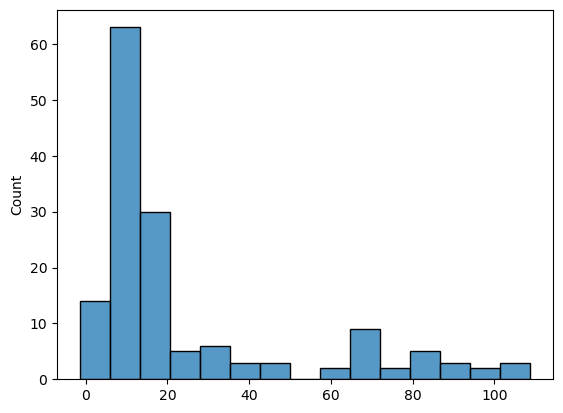

In [23]:
import seaborn as sns

from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
seed(1)
array = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)
array = append(array, tail)
sns.histplot(array)

In [24]:
columns = ['amount']
df_exp = pd.DataFrame(data = array, columns = columns)
  
df_exp.describe()

,amount
count,150.000000
mean,25.194928
std,27.371117
min,-1.507693
25%,8.683707
50%,12.923596
75%,28.576996
max,108.861615


In [25]:
df_exp

,amount
0,18.121727
1,6.941218
2,7.359141
3,4.635157
4,14.327038
...,...
145,31.017401
146,85.275555
147,16.653648
148,36.031510


## Standard Scalar in Vectorized Pandas

This is an efficient way to transform our input Pandas column into a range of [0.0, 1.]

In [26]:
# Min-Max Normalization in Pandas
df_norm = (df_exp-df_exp.min())/(df_exp.max()-df_exp.min())
df_norm.head()

,amount
0,0.177852
1,0.076551
2,0.080338
3,0.055657
4,0.143470


<AxesSubplot:ylabel='Count'>

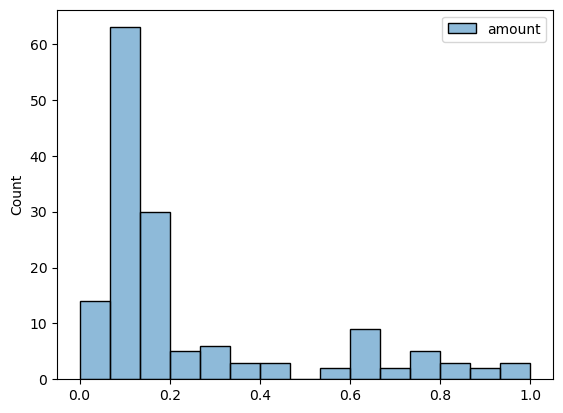

In [27]:
sns.histplot(df_norm)

## Power Transformer in Scikit-Learn

Scikit-Learn has many different transformation libraries.
For heavy-tailed distributions, it is often recommended to perform a [power transformation](
https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94)

We can see in the histogram, this produces a more Gaussian (normal) distribution than the MinMax Scalar.

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df_power = pd.DataFrame(
    pt.fit_transform(df_exp[["amount"]]), columns=["amount"]
)

sns.histplot(df_power)